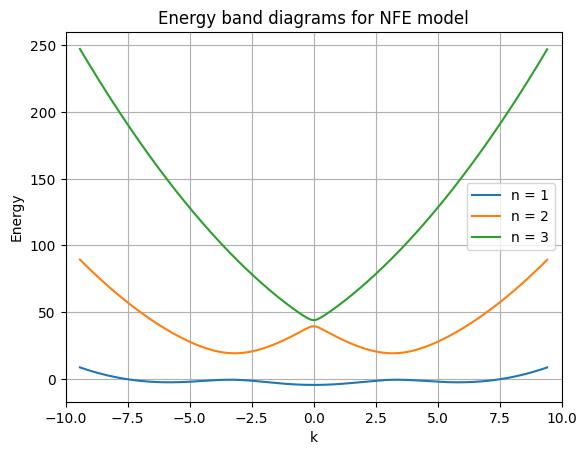

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define constant
U_0 = 10
a = 1
K = 2 * np.pi / a

# Define the matrix (simplified)
def m(k):
    return np.array([
        [(k-K)**2, U_0, 0],
        [U_0, k**2, U],
        [0, U, (k+K)**2]
    ])

# Calc the eigenvalues
def eigenvalues(k):
    return np.linalg.eigvalsh(m(k))
# Set the range of k
k_range = np.arange(-1.5 * K, 1.5 * K, 0.01)

# Storage the eigenvalues as the arrays
eigenvalues_list = [eigenvalues(k) for k in k_range]

# Take the eigevalues to plot
e1 = [e[0] for e in eigenvalues_list]
e2 = [e[1] for e in eigenvalues_list]
e3 = [e[2] for e in eigenvalues_list]

plt.plot(k_range, e1, label='n = 1')
plt.plot(k_range, e2, label='n = 2')
plt.plot(k_range, e3, label='n = 3')
plt.xlabel('k')
plt.ylabel('Energy')
plt.xlim(-10,10)
plt.title('Energy band diagrams for NFE model')
plt.legend()
plt.grid()
plt.show()


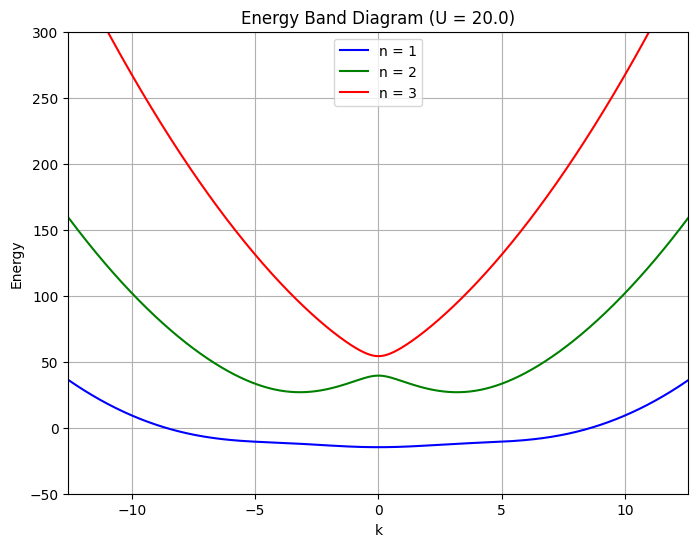

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define constant
U = 10
a = 1
K = 2 * np.pi / a

# Define the matrix (simplified)
def m(k, U):
    return np.array([
        [(k-K)**2, U, 0],
        [U, k**2, U],
        [0, U, (k+K)**2]
    ])

# Calc the eigenvalues
def eigenvalues(k, U):
    return np.linalg.eigvalsh(m(k, U))

# Set the range of k
k_range = np.arange(-2 * K, 2 * K, 0.01)

# Initialize figure and axes
fig, ax = plt.subplots(figsize=(8, 6))
line1, = ax.plot([], [], label='n = 1', color='b')
line2, = ax.plot([], [], label='n = 2', color='g')
line3, = ax.plot([], [], label='n = 3', color='r')

# Set up the plot details
ax.set_xlim(k_range.min(), k_range.max())
ax.set_ylim(-50,300)  # Adjust this based on energy range
ax.set_xlabel('k')
ax.set_ylabel('Energy')
ax.set_title('Energy Band Diagram for NFE Model (Dynamic U)')
ax.legend()
ax.grid()

# Animation update function
def update(U):
    eigenvalues_list = [eigenvalues(k, U) for k in k_range]
    e1 = [e[0] for e in eigenvalues_list]
    e2 = [e[1] for e in eigenvalues_list]
    e3 = [e[2] for e in eigenvalues_list]
    line1.set_data(k_range, e1)
    line2.set_data(k_range, e2)
    line3.set_data(k_range, e3)
    ax.set_title(f'Energy Band Diagram (U = {U:.1f})')
    return line1, line2, line3

# Define the range of U for animation
U_values = np.linspace(1, 20, 100)  # U from 1 to 20

# Create animation
ani = FuncAnimation(fig, update, frames=U_values, blit=True, interval=100)
ani.save('energy_band_animation.gif', writer='pillow', fps=30)
